Cobra documentation: https://cobrapy.readthedocs.io/en/latest/index.html



In case Cobra doesn't run do the following:

* Go to the Files list and open a terminal (`terminal.term`)
* Type: `pip3 install --upgrade python-libsbml`
* Type: `pip3 install --upgrade sympy`
* Type: `pip3 install --upgrade cobra`
* Go to Settings and click on `Restart project`



In [2]:
import cobra
import matplotlib.pyplot as plt
import random
random.seed(42)

## Exercise: using a metabolic model of <i>Chlamydomonas reinhardtii</i>.

* Read the model, which is available in the file "iRC1080-Chapman3.xml" (you can ignore any warning messages).

In [3]:
chlamyNet = "iRC1080-Chapman3.xml"
model = cobra.io.read_sbml_model(chlamyNet)

'' is not a valid SBML 'SId'.
No objective coefficients in model. Unclear what should be optimized


In [4]:
model

Name,
Memory address,138570440
Number of metabolites,1706
Number of reactions,2191
Number of genes,1086
Number of groups,112
Objective expression,0
Compartments,"Cytosol, Chloroplast, Mitochondria, Glyoxysome, Flagellum, Extra-organism, Nucleus, Golgi Apparatus, Eyespot, Thylakoid Lumen"


* Print the number of reactions, metabolites and genes.

In [5]:
print("Reactions:", len(model.reactions))
print("Metabolites:", len(model.metabolites))
print("Genes:", len(model.genes))

Reactions: 2191
Metabolites: 1706
Genes: 1086


* Find all occurrences of fumarate in the model and print their IDs.
* In which cellular compartments is fumarate present?

In [6]:
for m in model.metabolites:
    if "Fumarate" in m.name:
        print(m.id, ': ', m.name)
print(model.compartments)

fum_c :  Fumarate
fum_h :  Fumarate
fum_m :  Fumarate
{'c': 'Cytosol', 'h': 'Chloroplast', 'm': 'Mitochondria', 'x': 'Glyoxysome', 'f': 'Flagellum', 'e': 'Extra-organism', 'n': 'Nucleus', 'g': 'Golgi Apparatus', 's': 'Eyespot', 'u': 'Thylakoid Lumen'}


* Print the chemical formula and charge of fumarate.

In [7]:
fumarate = model.metabolites.get_by_id("fum_c")
print(fumarate.name)
print("Formula:", fumarate.formula)
print("Charge:", fumarate.charge)

Fumarate
Formula: C4H2O4
Charge: 0


* List all reactions containing fumarate.

In [8]:
for r in fumarate.reactions:
    print(r.id, r.name, r.reaction)

SUCFUMthr succinate-fumarate antiport, chloroplast fum_h + succ_c <=> fum_c + succ_h
ARGSL argininosuccinate lyase argsuc_c <=> arg_DASH_L_c + fum_c
SUCFUMtmr Succinate/fumarate antiporter, mitochondrial fum_m + succ_c <=> fum_c + succ_m
AAL_LPAREN_fum_RPAREN_ N6-(1,2-dicarboxyethyl)AMP AMP-lyase (fumarate-forming) dcamp_c --> amp_c + fum_c
AIAL 1-(5'-Phosphoribosyl)-5-amino-4-(N-succinocarboxamide)-imidazole AMP-lyase 25aics_c <=> aicar_c + fum_c
FAA fumarylacetoacetase 4fumacac_c + h2o_c --> acac_c + fum_c + h_c


* Set the biomass objective to heterotrophic growth.
* Run FBA and print the objective value (biomass production).



In [9]:
for r in model.reactions:
    if "Biomass" in r.name:
        print(r.id, ': ', r.name)
biomass_rxn = model.reactions.get_by_id("Biomass_Chlamy_hetero")
biomass_rxn.objective_coefficient = 1
#biomass_rxn = model.reactions.get_by_id("Biomass_Chlamy_auto")
#biomass_rxn.objective_coefficient = 0
#biomass_rxn = model.reactions.get_by_id("Biomass_Chlamy_mixo")
#biomass_rxn.objective_coefficient = 0
solution = model.optimize()
print("FBA status:", solution.status)
print("FBA solution:", solution.objective_value)

Biomass_Chlamy_auto :  Biomass (autotrophic)
Biomass_Chlamy_mixo :  Biomass (mixotrophic)
Biomass_Chlamy_hetero :  Biomass (heterotrophic)
FBA status: optimal
FBA solution: 6.3733278331230325


* Print the flux of all reactions containing fumarate.

In [10]:
for r in fumarate.reactions:
    print(r.id, solution.fluxes[r.id])

SUCFUMthr 0.0
ARGSL 0.6053108819227954
SUCFUMtmr -31.0440921180191
AAL_LPAREN_fum_RPAREN_ 29.362480026657835
AIAL 1.0763012094384732
FAA 0.0


* Find the reaction that imports extracellular acetate into the cell.

In [11]:
for m in model.metabolites:
    if "Acetate" in m.name:
        print(m.id, ": ", m.name)
acetate= model.metabolites.get_by_id("ac_e")
for r in acetate.reactions:
    print(r.id, r.name, ": ", r.reaction)

exac = model.reactions.get_by_id("EX_ac_LPAREN_e_RPAREN_")

ac_c :  Acetate
ac_e :  Acetate
ac_h :  Acetate
ac_m :  Acetate
ac_s :  Acetate
ACt acetate transport in via proton symport :  ac_e <=> ac_c
EX_ac_LPAREN_e_RPAREN_ Acetate exchange :  ac_e <=> 


* Set the acetate import flux to 10.
* Run FBA and print the objective value.

In [12]:
exac.lower_bound = -10
exac.upper_bound = -10
solution = model.optimize()
print("FBA status:", solution.status)
print("FBA solution:", solution.objective_value)

FBA status: optimal
FBA solution: 6.373327833116916


- Run a series of FBA simulations with the acetate uptake flux ranging from 0 to 20.
- Plot a line graph showing how the flux of the argininosuccinate lyase reaction varies depending on the acetate.  



[np.float64(1.2318202887591823), np.float64(1.1577462146850925), np.float64(1.083672140611021), np.float64(1.0095980665369475), np.float64(0.9355239924628709), np.float64(0.8614499183887963), np.float64(0.7873758443147233), np.float64(0.713301770240651), np.float64(0.6777148417708829), np.float64(0.6499370639931407), np.float64(0.6221592862153644), np.float64(0.6053108819221927), np.float64(0.6053108819222206), np.float64(0.6053108819222215), np.float64(0.6053108819222215), np.float64(0.6053108819222274), np.float64(0.6053108819222282), np.float64(0.6053108819222363), np.float64(0.6053108819222355), np.float64(0.605310881922231)]


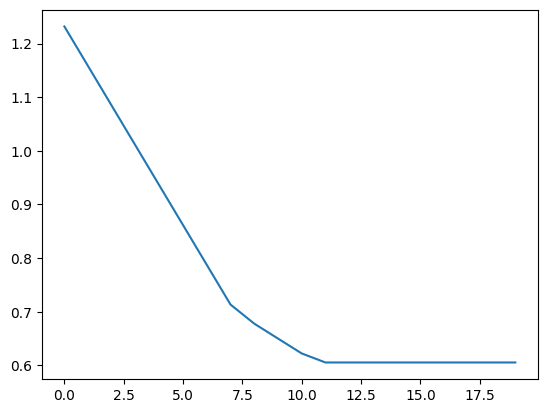

In [13]:
random.seed(42)
arg_flux = list()
for ac_flux in range(0, 20):
    #exac.bounds = (0,0)
    exac.bounds = (-ac_flux, -ac_flux)
    solution = model.optimize()
#    solution = cobra.flux_analysis.pfba(model)
    arg_flux.append(solution.fluxes["ARGSL"])
print(arg_flux)
x = [x for x in range(0, 20)]
plt.plot(x, arg_flux)